In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [6]:
# Print column names
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# Print description of Boston housing data set
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
#add column names
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
print (boston.target.shape)

(506,)


In [11]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5,1,'Relationship between CRIM and Price')

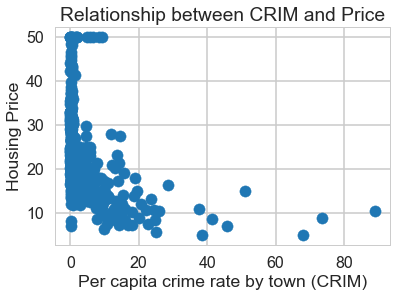

In [13]:
#Scatter Plots
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

Text(0.5,1,'Relationship between RM and Price')

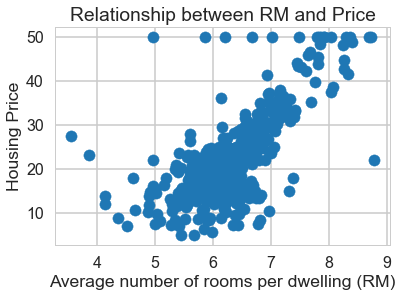

In [14]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

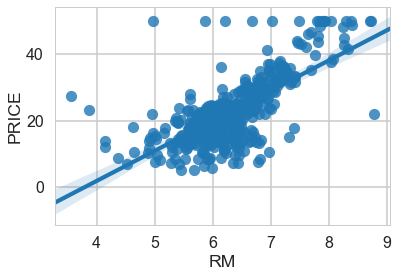

In [15]:
# We can also use seaborn regplot for this
#  This provides automatic linear regression fits (useful for data exploration later on)

sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

Text(0.5,1,'Relationship between PTRATIO and Price')

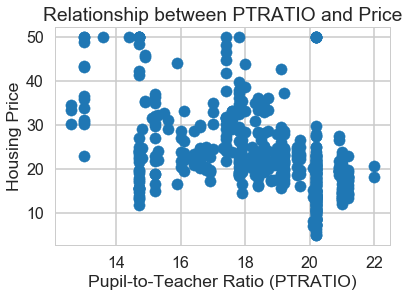

In [16]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

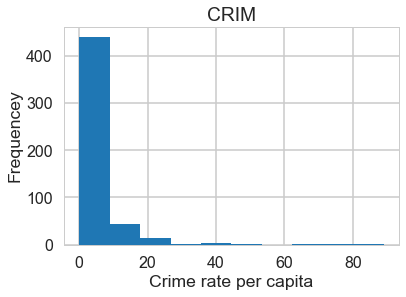

In [17]:
#Histograms
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

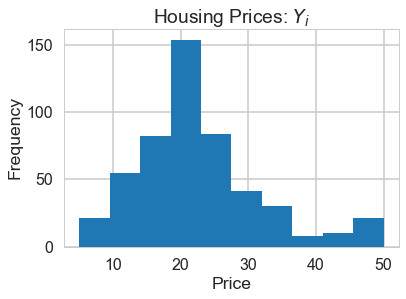

In [18]:
plt.hist(bos.PRICE)
plt.title('Housing Prices: $Y_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [19]:
#Fitting Linear Regression using statsmodels

# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [21]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 05 Aug 2019   Prob (F-statistic):           2.49e-74
Time:                        10:22:47   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

Text(0.5,1,'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

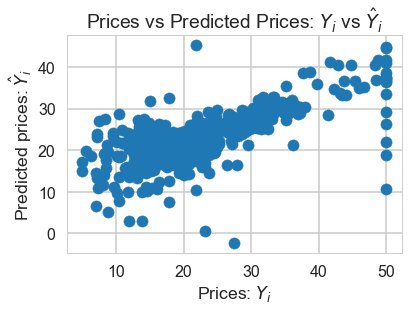

In [22]:
plt.scatter(bos['PRICE'], m.fittedvalues)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

In [23]:
#Fitting Linear Regression using sklearn
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
lm.<tab>

SyntaxError: invalid syntax (<ipython-input-25-0bd50071d880>, line 1)

In [26]:
#Fit a linear model
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
#Estimated intercept and coefficients
print ('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 36.4911032804


In [28]:
print ('Number of coefficients:', len(lm.coef_))

Number of coefficients: 13


In [29]:
# The coefficients
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

TypeError: data argument can't be an iterator

In [30]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

Text(0,0.5,'Frequency')

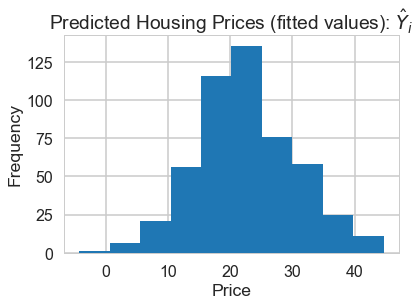

In [31]:
plt.hist(lm.predict(X))
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [33]:
# Residual sum of squares
print (np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.2762841


In [34]:
#Mean squared error
mseFull = np.mean((bos.PRICE - lm.predict(X)) ** 2)
print (mseFull)

21.897779217687486


In [35]:
#Relationship between PTRATIO and housing price
lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
print (msePTRATIO)

62.65220001376927


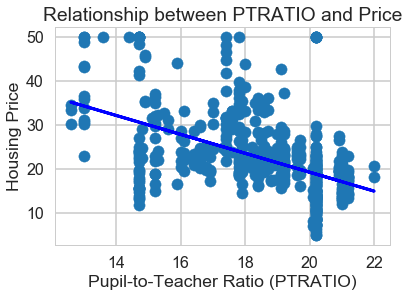

In [37]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

plt.plot(bos.PTRATIO, lm.predict(X[['PTRATIO']]), color='blue', linewidth=3)
plt.show()

In [39]:
#Training and Test Data sets
X_train = X[:-50]
X_test = X[-50:]
Y_train = bos.PRICE[:-50]
Y_test = bos.PRICE[-50:]
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(456, 13)
(50, 13)
(456,)
(50,)


In [40]:
# Let's build a linear regression model using our new training data sets.
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [41]:
#Now, calculate the mean squared error using just the test data and compare to mean squared from using all the data to fit the model.
print ("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2))
print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 23.191556469214927
Fit a model X_train, and calculate MSE with X_test, Y_test: 10.966543166781058


Text(0,0.5,'Residuals')

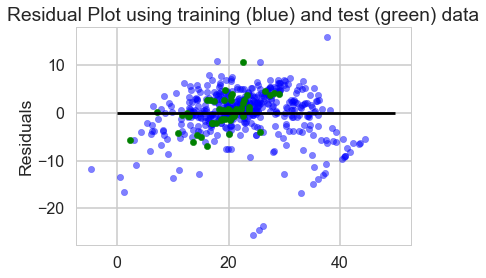

In [42]:
#Residual plots
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

In [ ]:
## Another Example: Old Faithful Geyser Data Set that is found in R programming language

faithful = sm.datasets.get_rdataset("faithful")

In [ ]:
faithful.title

In [ ]:
faithful = faithful.data
faithful.head()

In [ ]:
faithful.shape

In [ ]:
# Histogram
plt.hist(faithful.waiting)
plt.xlabel('Waiting time to next eruption (in mins)')
plt.ylabel('Frequency')
plt.title('Old Faithful Geyser time between eruption')
plt.show()

In [ ]:
# Scatterplot
plt.scatter(faithful.waiting, faithful.eruptions)
plt.xlabel('Waiting time to next eruption (in mins)')
plt.ylabel('Eruption time (in mins)')
plt.title('Old Faithful Geyser')
plt.show()

In [ ]:
#Build a linear regression to predict eruption time using statsmodels
X = faithful.waiting
y = faithful.eruptions
model = sm.OLS(y, X)

In [ ]:
results = model.fit()

In [ ]:
print (results.summary())

In [ ]:
results.params.values

In [ ]:
# We notice, there is no intercept ($\beta_0$) fit in this linear model. To add it, we can use the function sm.add_constant.
X = sm.add_constant(X)
X.head()

In [ ]:
#Now let's fit a linear regression model with an intercept.
modelW0 = sm.OLS(y, X)
resultsW0 = modelW0.fit()
print (resultsW0.summary())

In [ ]:
#If you want to predict the time to the next eruption using a waiting time of 75, you can directly estimate this using the equation

newX = np.array([1,75])
resultsW0.params[0]*newX[0] + resultsW0.params[1] * newX[1]

In [ ]:
resultsW0.predict(newX)

In [ ]:
#plot the regression line
plt.scatter(faithful.waiting, faithful.eruptions)
plt.xlabel('Waiting time to next eruption (in mins)')
plt.ylabel('Eruption time (in mins)')
plt.title('Old Faithful Geyser')

plt.plot(faithful.waiting, resultsW0.fittedvalues, color='blue', linewidth=3)
plt.show()

In [ ]:
#Residuals, residual sum of squares, mean squared error
resids = faithful.eruptions - resultsW0.predict(X)
resids = resultsW0.resid

In [ ]:
plt.plot(faithful.waiting, resids, 'o')
plt.hlines(y = 0, xmin=40, xmax = 100)
plt.xlabel('Waiting time')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
print (np.sum((faithful.eruptions - resultsW0.predict(X)) ** 2))

In [ ]:
print (np.mean((faithful.eruptions - resultsW0.predict(X)) ** 2))

In [ ]:
#Build a linear regression to predict eruption time using least squares
X = sm.add_constant(faithful.waiting)
y = faithful.eruptions

In [ ]:
np.dot(X.T, X)

In [ ]:
np.linalg.inv(np.dot(X.T, X))

In [ ]:
beta = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
print ("Directly estimating beta:", beta)
print ("Estimating beta using statmodels: ", resultsW0.params.values)